In [1]:
# Download Dataset from Kaggle

import os
import zipfile
import kagglehub



path = kagglehub.dataset_download("kundanbedmutha/exam-score-prediction-dataset")

print("Path to dataset files:", path)





/Users/mohammedbalkhair/bootcamp/Week-3/ML_WorkFlow_Playground/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/mohammedbalkhair/.cache/kagglehub/datasets/kundanbedmutha/exam-score-prediction-dataset/versions/2


In [2]:
# Load Data

import pandas as pd

df = pd.read_csv(os.path.join(path, 'Exam_Score_Prediction.csv'))

print(df.shape)
df.head()



(20000, 13)


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [4]:
print(df['gender'].value_counts())
print(df['course'].value_counts())
print(df['sleep_quality'].value_counts())
print(df['study_method'].value_counts())
print(df['facility_rating'].value_counts())
print(df['exam_difficulty'].value_counts())




gender
other     6726
male      6695
female    6579
Name: count, dtype: int64
course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64
sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64
study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64
facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64
exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64


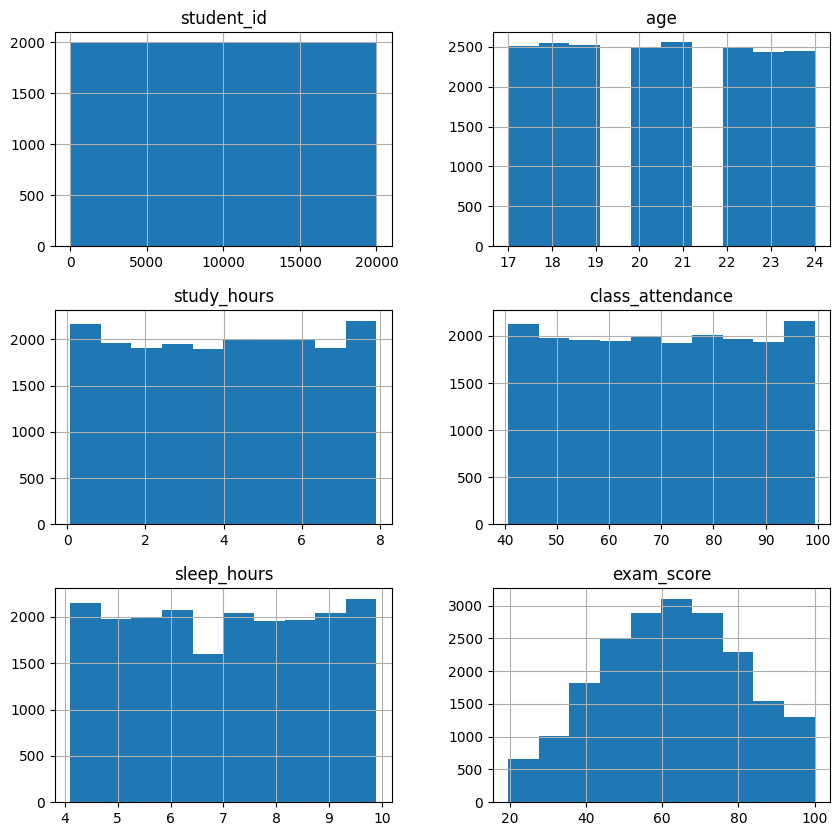


Correlation Matrix:
                  student_id       age  study_hours  class_attendance  \
student_id          1.000000 -0.002574     0.002116          0.001128   
age                -0.002574  1.000000     0.002955          0.008449   
study_hours         0.002116  0.002955     1.000000         -0.001645   
class_attendance    0.001128  0.008449    -0.001645          1.000000   
sleep_hours        -0.000560 -0.000385    -0.004533          0.007187   
exam_score          0.003269  0.006522     0.717788          0.308850   

                  sleep_hours  exam_score  
student_id          -0.000560    0.003269  
age                 -0.000385    0.006522  
study_hours         -0.004533    0.717788  
class_attendance     0.007187    0.308850  
sleep_hours          1.000000    0.133222  
exam_score           0.133222    1.000000  


In [5]:
import matplotlib.pyplot as plt

cat_columns = ['gender', 'course', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty','internet_access']
num_col = df.drop(columns=['gender', 'course', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty','internet_access'])
cat_col = df[cat_columns]

num_col.hist(figsize=(10, 10))
plt.show()

print("\nCorrelation Matrix:")
print(num_col.corr())


In [6]:
cat_col = pd.get_dummies(cat_col)
# Drop student_id as it's just an identifier, not a predictive feature
num_col = num_col.drop(columns=['student_id'])
df = pd.concat([num_col, cat_col], axis=1)
df.head()



,age,study_hours,class_attendance,sleep_hours,exam_score,gender_female,gender_male,gender_other,course_b.com,course_b.sc,...,study_method_online videos,study_method_self-study,facility_rating_high,facility_rating_low,facility_rating_medium,exam_difficulty_easy,exam_difficulty_hard,exam_difficulty_moderate,internet_access_no,internet_access_yes
0,17,2.78,92.9,7.4,58.9,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
1,23,3.37,64.8,4.6,54.8,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,True
2,22,7.88,76.8,8.5,90.3,False,True,False,False,True,...,False,False,True,False,False,False,False,True,False,True
3,20,0.67,48.4,5.8,29.7,False,False,True,False,False,...,True,False,False,True,False,False,False,True,False,True
4,20,0.89,71.6,9.8,43.7,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True


In [7]:
import sys
sys.path.append('../')

import numpy as np
from src import LinearRegression, r_squared, mse, display_metrics
from sklearn.model_selection import train_test_split

X = df.drop(columns=['exam_score'])
Y = df['exam_score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)

print("Model trained successfully!")
print(f"Coefficients shape: {model.coefficients.shape}")
print(f"Intercept: {model.intercept:.2f}")

Model trained successfully!
Coefficients shape: (30,)
Intercept: 845426288720467456.00


# Evaluate Model

Using our custom metrics and display functions from `src` to evaluate model performance.


In [8]:
Y_pred = model.predict(X_test)

print("Model Performance:")
print(f"R² Score: {r_squared(Y_test, Y_pred):.4f}")
print(f"MSE: {mse(Y_test, Y_pred):.2f}")
print(f"RMSE: {np.sqrt(mse(Y_test, Y_pred)):.2f}")

display_metrics(Y_test, Y_pred, task_type='regression')

Model Performance:
R² Score: -7671.0216
MSE: 2744259.23
RMSE: 1656.58
MODEL PERFORMANCE METRICS

Regression Metrics:
  R² Score:  -7671.021560
  MSE:       2744259.232807



# Cross Validation and Grid Search

Using our custom cross-validation and grid search functions from `src` to find the best model.
    metric=mean_squared_error,
    shuffle=True,
    random_state=42
)

print(f"Mean MSE: {mean_score:.2f} (+/- {std_score:.2f})")
print(f"All fold scores: {[f'{s:.2f}' for s in all_scores]}")

In [9]:
from src import cross_validate, grid_search_cv, get_random_forest_regressor
from sklearn.metrics import mean_squared_error

df_cv = df.copy()

print("=== Custom Cross Validation ===")
best_model_cv, mean_score, std_score, all_scores = cross_validate(
    dataframe=df_cv,
    model=LinearRegression,
    target_col='exam_score',
    k_folds=5,
    metric=mean_squared_error,
    shuffle=True,
    random_state=42
)

print(f"Mean MSE: {mean_score:.2f} (+/- {std_score:.2f})")
print(f"All fold scores: {[f'{s:.2f}' for s in all_scores]}")


=== Custom Cross Validation ===
Mean MSE: 70099606.88 (+/- 40277088.59)
All fold scores: ['95.50', '59694544.69', '75344082.79', '97018287.17', '118441024.26']


In [10]:
print("\n=== Grid Search with Random Forest ===")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search = grid_search_cv(
    model=get_random_forest_regressor,
    X=X.values,
    y=Y.values,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (neg MSE): {grid_search.best_score_:.2f}")

best_rf_model = grid_search.best_estimator_
rf_pred = best_rf_model.predict(X_test)

print("\nBest Random Forest Model Performance:")
print(f"R² Score: {r_squared(Y_test, rf_pred):.4f}")
print(f"MSE: {mse(Y_test, rf_pred):.2f}")
print(f"RMSE: {np.sqrt(mse(Y_test, rf_pred)):.2f}")

display_metrics(Y_test, rf_pred, task_type='regression')



=== Grid Search with Random Forest ===
Best parameters: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 200}
Best score (neg MSE): -109.68

Best Random Forest Model Performance:
R² Score: 0.7193
MSE: 100.39
RMSE: 10.02
MODEL PERFORMANCE METRICS

Regression Metrics:
  R² Score:  0.719337
  MSE:       100.392362



/Users/mohammedbalkhair/bootcamp/Week-3/ML_WorkFlow_Playground/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
